In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def f(x):
    return x

In [3]:
interact(f, x=10);

12

In [4]:
interact(f, x='Hi there!');

'Hi there!'

In [5]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 0.1)

In [6]:

def h(p, q):
    return (p, q)

In [7]:
interact(h, p=5, q=fixed(20));

(1, 20)

In [10]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10

In [11]:
interact(f, x=['apples','oranges']);

'oranges'

In [12]:
interact(f, x={'one': 10, 'two': 20});

20

In [13]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [14]:
w = interactive(f, a=10, b=20)

In [15]:
display(w)

9

9

In [16]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

In [17]:

%%time
slow_function(1e6)

1000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
CPU times: user 500 ms, sys: 0 ns, total: 500 ms
Wall time: 499 ms


In [18]:
from ipywidgets import FloatSlider
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

4900000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [19]:
interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

5900000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [20]:
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False));

2600000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [21]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

8.4 7.35


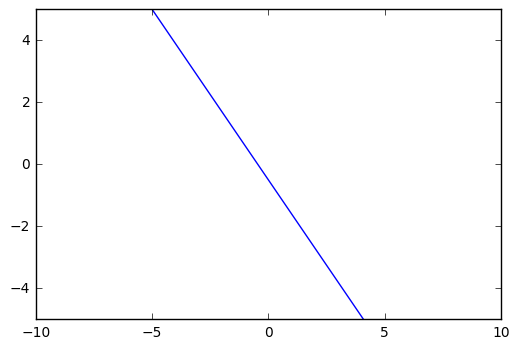

In [25]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '50px'
interactive_plot

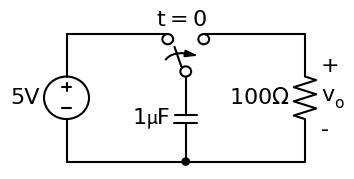

In [26]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='5V')
d.add(e.LINE, d='right', l=d.unit*.75)
S1 = d.add(e.SWITCH_SPDT2_CLOSE, d='up', anchor='b', rgtlabel='$t=0$')
d.add(e.LINE, d='right', xy=S1.c,  l=d.unit*.75)
d.add(e.RES, d='down', label='$100\Omega$', botlabel=['+','$v_o$','-'])
d.add(e.LINE, to=V1.start)
d.add(e.CAP, xy=S1.a, d='down', toy=V1.start, label='1$\mu$F')
d.add(e.DOT)
d.draw(showplot=False)
d.save('cap_charge.svg')